In [88]:
import tensorflow as tf
from tensorflow.keras import datasets , layers ,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras

In [89]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [90]:
x_train.shape

(50000, 32, 32, 3)

In [91]:
x_test.shape

(10000, 32, 32, 3)

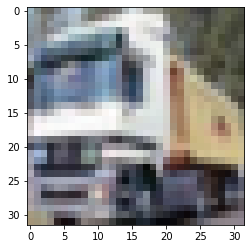

In [92]:
plt.imshow(x_train[1])

In [93]:
classes = [ "airplane" , "automobile" ,"bird", "cat", "deer", "dog" ,"frog" ,"horse" ,"ship" ,"truck"]

In [94]:
 y_train.shape

(50000, 1)

In [95]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [96]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [97]:
classes[9]

'truck'

In [98]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

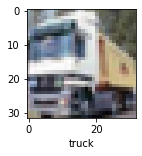

In [99]:
plot_sample(x_train,y_train,1)

In [100]:
x_train =x_train/255
x_test = x_test/255


In [101]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [102]:
model = keras.Sequential(
    [
     layers.Conv2D(filters=64,kernel_size=(3,3), activation ='relu' ,input_shape=(32,32,3)),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(filters=32,kernel_size=(3,3), activation ='relu'),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(filters=32,kernel_size=(3,3), activation ='relu'),
     layers.MaxPool2D((2,2)),
     keras.layers.Flatten(),
     keras.layers.Dense(32,activation ="relu"),
     keras.layers.Dense(10 ,activation ="softmax"),
     
    ]
)

model.compile(optimizer = "Adadelta",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2985 - accuracy: 0.1251
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2946 - accuracy: 0.1353
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2917 - accuracy: 0.1400
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2889 - accuracy: 0.1448
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2860 - accuracy: 0.1461


In [103]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification report: \n" , classification_report(y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.05      0.01      0.02      1000
           1       0.07      0.02      0.03      1000
           2       0.00      0.00      0.00      1000
           3       0.10      0.02      0.03      1000
           4       1.00      0.00      0.00      1000
           5       0.11      0.09      0.10      1000
           6       0.00      0.00      0.00      1000
           7       0.13      0.18      0.15      1000
           8       0.16      0.89      0.27      1000
           9       0.14      0.23      0.17      1000

    accuracy                           0.14     10000
   macro avg       0.18      0.14      0.08     10000
weighted avg       0.18      0.14      0.08     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2850 - accuracy: 0.1431


[2.2850077152252197, 0.14309999346733093]

In [105]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2832 - accuracy: 0.1477
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2801 - accuracy: 0.1498
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2766 - accuracy: 0.1519
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2726 - accuracy: 0.1539
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2677 - accuracy: 0.1566
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2624 - accuracy: 0.1590
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2568 - accuracy: 0.1602
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2508 - accuracy: 0.1632
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2444 - accuracy: 0.1648
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.237

In [106]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2345 - accuracy: 0.1625


[2.2344555854797363, 0.16249999403953552]

In [107]:
model.fit(x_train,y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2301 - accuracy: 0.1718
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2211 - accuracy: 0.1762
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2104 - accuracy: 0.1812
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2001 - accuracy: 0.1858
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1902 - accuracy: 0.1887
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1806 - accuracy: 0.1903
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1709 - accuracy: 0.1938
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1615 - accuracy: 0.1959
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1524 - accuracy: 0.1982
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.143

In [108]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.0766 - accuracy: 0.2151


[2.076577663421631, 0.2151000052690506]

In [109]:
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0738 - accuracy: 0.2191
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0689 - accuracy: 0.2210
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0641 - accuracy: 0.2221
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0595 - accuracy: 0.2237
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0550 - accuracy: 0.2259
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0506 - accuracy: 0.2276
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0463 - accuracy: 0.2297
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0421 - accuracy: 0.2317
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0379 - accuracy: 0.2334
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.033

In [110]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.9060 - accuracy: 0.2966


[1.9060230255126953, 0.29660001397132874]

In [111]:
model.fit(x_train,y_train, epochs=70)

Epoch 1/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9058 - accuracy: 0.2975
Epoch 2/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9031 - accuracy: 0.2986
Epoch 3/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9004 - accuracy: 0.2994
Epoch 4/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8977 - accuracy: 0.3013
Epoch 5/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8950 - accuracy: 0.3025
Epoch 6/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8922 - accuracy: 0.3045
Epoch 7/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8896 - accuracy: 0.3040
Epoch 8/70
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8869 - accuracy: 0.3056
Epoch 9/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8844 - accuracy: 0.3069
Epoch 10/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.881

In [112]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7535 - accuracy: 0.3633


[1.7535433769226074, 0.36329999566078186]

In [113]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7520 - accuracy: 0.3627
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7504 - accuracy: 0.3642
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7488 - accuracy: 0.3641
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7472 - accuracy: 0.3650
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7456 - accuracy: 0.3655
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7440 - accuracy: 0.3663
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7423 - accuracy: 0.3671
Epoch 8/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7408 - accuracy: 0.3675
Epoch 9/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7392 - accuracy: 0.3691
Epoch 10/100
1563/1563 [==============================] - 6s 4ms/step - l

In [114]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6371 - accuracy: 0.4034


[1.6370892524719238, 0.4034000039100647]